In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

# Midpoint method

The explicit Euler method is rarely used in problems of real practical importance, as it often requires impractically small integration steps to achieve the required accuracy goal. However, it does appear as a sub-step in some other important multistep formulas. 

The central difference (midpoint) formulas are of particular importance. They are very heavily used in numeric methods because they achieve a good balance between simplicity, stability and accuracy. In this chapter you will learn to apply the midpoint formula to an initial value problem.

After completing the chapter you should be able to:
* Use the first derivative midpoint rule to solve a first order IVP, either by using the explicit Euler method to obtain a starting value, or by obtaining a starting value from a more accurate rule such as the trapezoidal rule.
* Use the second derivative midpoint rule to solve a second order IVP by introducing a "ghost point", and recognise why we cannot use the explicit Euler method to obtain a starting value in this case.

## First order problem 

The general form of a (scalar) first order IVP is defined by a first order ODE together with the initial value of the variable:

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = f(t,x), \quad x(0)=x_0.
\end{equation}

We will demonstrate a quadratic order solution technique for this problem using the following example case:

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}{t}}=\cos\left(t+\frac{\pi}{4}\right), \quad x(0)=\frac{1}{\sqrt{2}}.
\end{equation}

Application of the midpoint rule results in the following formula, which requires two starting points:

\begin{equation}
\frac{x_{k+1}-x_{k-1}}{2h} = f(t_k,x_k) \qquad \implies \qquad x_{k+1}=x_{k-1}+2hf(t_k,x_k).
\end{equation}

The IVP gives us only one starting point, but we can estimate a second starting point by using the explicit Euler formula for the first step only. Although this formula is an order of accuracy worse than the midpoint formula, we will only use it for a single step.

The code below implements the algorithm for our example problem, using various step sizes to explore the effect on the error. The output is a table of the maximum errors for each step size, from which it can be seen that the errors scale with $h^2$. Decreasing the step size by a factor of two decreases the error by a factor of four:

In [2]:
# Libraries and definitions used in the following code
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,abs,pi,cos,sqrt

# Print function for tabulating output
def print_errs(hvals,err):
  n=len(hvals)
  print('Step size', '\tError', '\t\tRatio')
  for j in range(n-1):
    print('%.8f' % hvals[j+1], '\t%.8f' % err[j+1], '\t%.8f' % (err[j]/err[j+1]))

In [3]:
hvals=[2**-j for j in range(5,11)]    #Range of step sizes to try
err=[]                                #To record max errors

xsol = lambda t   :  sin(t+pi/4)      #Analytic solution      
dxdt = lambda t,x :  cos(t+pi/4)      #Derivative definition
x0=1/sqrt(2)                          #Initial condition

for h in hvals: 
  t=np.arange(0,2*pi,h)               #Integration domain
  x=np.empty(t.shape); x[0]=x0        #Solution array                     
  x[1]=x[0]+h*dxdt(t[0],x[0])         #Explicit Euler (one step)

  for k in range(1,len(t)-1):
    x[k+1]=x[k-1]+2*h*dxdt(t[k],x[k]) #midpoint rule (remaining steps)

  E = max(abs(xsol(t)-x))             #Max error on domain
  err.append(E)

print_errs(hvals,err)                 #Print the errors

Step size 	Error 		Ratio
0.01562500 	0.00009823 	4.00035089
0.00781250 	0.00002456 	3.99996600
0.00390625 	0.00000614 	4.00000492
0.00195312 	0.00000153 	4.00000638
0.00097656 	0.00000038 	3.99999903


```{note}
Although we can get by with the explicit Euler result for the first step, using a higher order result such as the trapezoidal rule will normally give a more accurate result. For this example, using the trapezoidal rule for the first step gives a global result that is about 1.5 times more accurate than if the explicit Euler result is used for the first step.
```

## Second order problem

The general form of a second order IVP is defined by a second order ODE together with the initial value of the variable and its derivative:

```{math}
:label: ivp2
\frac{\mathrm{d}^2 x}{\mathrm{d}t^2}=f\left(t,x,\frac{\mathrm{d}x}{\mathrm{d}t}\right), \qquad x(t_0)=\alpha, \quad \frac{\mathrm{d}x}{\mathrm{d}t}\biggr|_{t=t_0}=\beta.
```

We will demonstrate solution techniques for this problem using the following example case:

```{math}
:label: 6-6
\ddot{x}=-\sin\left(t+\frac{\pi}{4}\right), \quad x(0)=\dot{x}(0)=\frac{1}{\sqrt{2}}.
```

### First derivative rule

The second order problem can be re-written as a first order IVP by definining $y=\dot{x}$ to obtain

\begin{equation}
\frac{\mathrm{d}\underline{x}}{\mathrm{d}t}=\underline{F}(t,\underline{x}), \qquad \underline{x}(t_0)=\begin{bmatrix}\alpha\\\beta\end{bmatrix}, \qquad \underline{x}=\begin{bmatrix}x\\y\end{bmatrix}.
\end{equation}

Therefore it could be solved using the midpoint method with a single explicit Euler step at the start, as above for the scalar case. In general, a $n$th order IVP can be re-cast in this way as a first order IVP with $n$ dependent variables.

For our example problem we obtain

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}y\\-\sin(t+\pi/4)\end{bmatrix}, \qquad \begin{bmatrix}x(0)\\y(0)\end{bmatrix}=\frac{1}{\sqrt{2}}\begin{bmatrix}1\\1\end{bmatrix}.
\end{equation}

The code below implements the algorithm for our example problem, using various step sizes to explore the effect on the error. From the output table it can be again seen that the errors scale with $h^2$:

In [4]:
err=[]                                  #Reset the error array

# Define the first order ODE system
def dXdt(t,X):
  x,y=X
  return np.array([y,-sin(t+pi/4)])

X0=np.array([1,1])/sqrt(2)              #Initial condition

for h in hvals: 
  t=np.arange(0,2*pi,h)                 #Domain
  X=np.empty((len(t),2)); X[0]=X0;      #Two-column solution array
  X[1]=X[0]+h*dXdt(t[0],X[0])           #Explicit Euler (1 step)

  for k in range(1,len(t)-1):
    X[k+1]=X[k-1]+2*h*dXdt(t[k],X[k])   #Midpoint rule (remaining steps)
  
  E = max(abs(xsol(t)-X[:,0]))          #Max error on domain
  err.append(E)

print_errs(hvals,err)                   #Print the errors

Step size 	Error 		Ratio
0.01562500 	0.00036135 	3.96003168
0.00781250 	0.00009034 	4.00004880
0.00390625 	0.00002258 	4.00001220
0.00195312 	0.00000565 	4.00000305
0.00097656 	0.00000141 	4.00000079


### Second derivative rule 

For the partial differential equations that we will encounter later, it is not possible to rewrite them in the manner of a first order system. Therefore we will need to use the finite difference formulae for the higher derivatives. In preparation for this, we will demonstrate the basic technique using our example problem.

Subsituting the second derivative midpoint formula into {eq}`6-6` gives

\begin{equation}
\frac{x_{k+1}-2x_k+x_{k-1}}{h^2}=\sin\left(t_k+\frac{\pi}{4}\right) \qquad \implies \qquad x_{k+1}=2x_k-x_{k-1}+h^2 \sin\left(t_k+\frac{\pi}{4}\right)
\end{equation}

Again, we require two starting points and it is natural for us to try using the explicit Euler formula for the first step. Unfortunately, it turns out that doing so contaminates the accuracy of the entire solution and results in global accuracy no better than $\mathcal{O}(h)$, as demonstrated below:

In [5]:
err=[]                               #Reset the error array

d2xdt2 = lambda t,x : -sin(t+pi/4)   #Define 2nd order ODE
x0 =1/sqrt(2); x0p=1/sqrt(2)         #Initial condition

for h in hvals: 
  t=np.arange(0,2*pi,h)              #Domain
  x=np.empty(t.shape); x[0]=x0;      #Solution array
  x[1]=x0+h*x0p                      #Explicit Euler (1 step)

  for k in range(1,len(t)-1):
    x[k+1]=2*x[k]-x[k-1]+h**2*d2xdt2(t[k],x[k]) #Midpoint rule

  E = max(abs(xsol(t)-x))            #Max error on domain
  err.append(E)

print_errs(hvals,err)                #Print the errors

Step size 	Error 		Ratio
0.01562500 	0.03478967 	2.00519336
0.00781250 	0.01737225 	2.00260000
0.00390625 	0.00868048 	2.00130084
0.00195312 	0.00433883 	2.00065063
0.00097656 	0.00216940 	2.00001436


When we used the explicit Euler method for a single step in the first derivative form of this problem it worked ok, so why not here? 

The explanation is very subtle, but is due to the way that the second derivative formula propagates errors. It can be shown that the errors $E_k$ in midpoint formulae obey

* 1st derivative: $\quad\  E_{k+1}=E_{k-1}+\mathcal{O}(h^3)$
* 2nd derivative: $\quad E_{k+1} = 2E_k-E_{k-1}+\mathcal{O}(h^3)$

The error introduced by the explicit Euler formula in the first step is $E_1=\mathcal{O}(h^2)$. Applying the above formulae recursively with this error gives a global error of $\mathcal{O}(h^2)$ in the first derivative approximation and a global error of $\mathcal{O}(h)$ in the second derivative approximation.

So, we need to use a result for the first step that has the same order of accuracy as the midpoint method. There are lots of ways to do this, but we will use a technique that is based on the midpoint formula. We will be able to implement the same method later to also solve partial differential equations.

The trick involves the introduction of a "ghost point" $x_{-1}$ outside the solution domain. Application of the midpoint rule to the initial condition for the derivative then gives the following result, which can be solved simultaneously with the update rule to obtain $x_1$ :

\begin{equation}
\frac{x_1-x_{-1}}{2h}=x_0^{\prime}.
\end{equation}

```{exercise}

By combining the equation above with the second differerence update rule and initial value $x_0$, obtain a result for $x_1$. Replace the explicit Euler step with your result, and show the the global error is reduced to $\mathcal{O}(h^2)$.
```

````{toggle}
For this problem, we have the following rules
\begin{equation}
x_{1}=2x_0-x_{-1}+h^2 x_0^{\prime\prime}, \qquad x_1 = x_{-1}+2hx_0^{\prime}.
\end{equation}

Solving simultaneously gives 

\begin{equation*}
x_1=x_0+hx_0^{\prime}+\frac{h^2}{2} x_0^{\prime\prime}.
\end{equation*}

This may be implemented by changing the one-step Euler calculation to:

```{code}
x[1]=x0+h*x0p+h**2/2*d2xdt2(0,x0)
```

You should see that the error then decreases quadratically with $h$.

````


```{warning}
The moral of the story is that if we are using the second derivative formula we need to implement a second order boundary condition.
```

(cauchy_example)=
## Chapter exercise

Implement the midpoint method using the second derivative rule to solve the following second order linear IVP with step size $h=0.001$, and produce a plot of the errors:

```{math}
:label: 2order_cau
\ddot{x} + 2\dot{x}+10 x = 0, \qquad x(0)=1, \quad \dot{x}(0)=-1.
```

The analytic solution of this IVP is given by

\begin{equation}
x = e^{-3t}\cos(3t).
\end{equation}

A plot of the analytic solution is shown below:

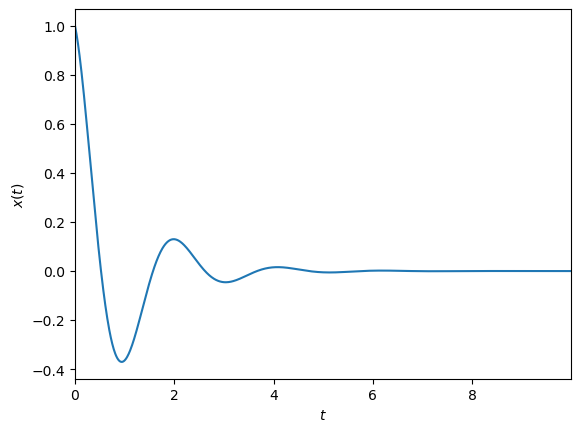

In [6]:
from numpy import arange,cos,exp
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0

h=0.01
t=arange(0,10,h)
xsol=exp(-t)*cos(3*t)
plt.plot(t,xsol)
plt.xlabel('$t$'); plt.ylabel('$x(t)$')
plt.show()